In [3]:
!pip uninstall numpy pmdarima -y


Found existing installation: numpy 2.3.1
Uninstalling numpy-2.3.1:
  Successfully uninstalled numpy-2.3.1
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4


In [1]:
!pip install numpy==1.24.4
!pip install pmdarima==2.0.3


  Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.9 MB)


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import datetime as dt
from datetime import timedelta
from datetime import date

# Using NVIDIA Stock Dataset

In [6]:
nvda = yf.download("NVDA", start="2015-01-01", end=dt.datetime.now().strftime('%Y-%m-%d'))
df= nvda

/tmp/ipython-input-6-4134138669.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda = yf.download("NVDA", start="2015-01-01", end=dt.datetime.now().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


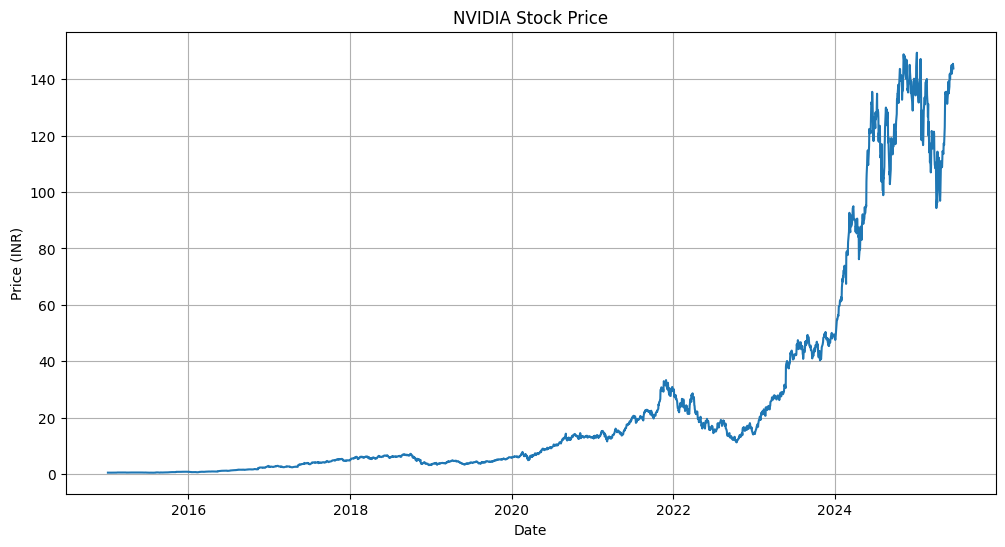

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("NVIDIA Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [9]:
prices = df['Close'].dropna()


In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

#Check Stationarity

In [17]:
result = adfuller(prices)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 1.535537019658508
p-value: 0.9976506965949979


In [21]:
#If not stationary, differantiate the series
prices_diff = prices.diff().dropna()


# Plot ACF and PCF to define p and q

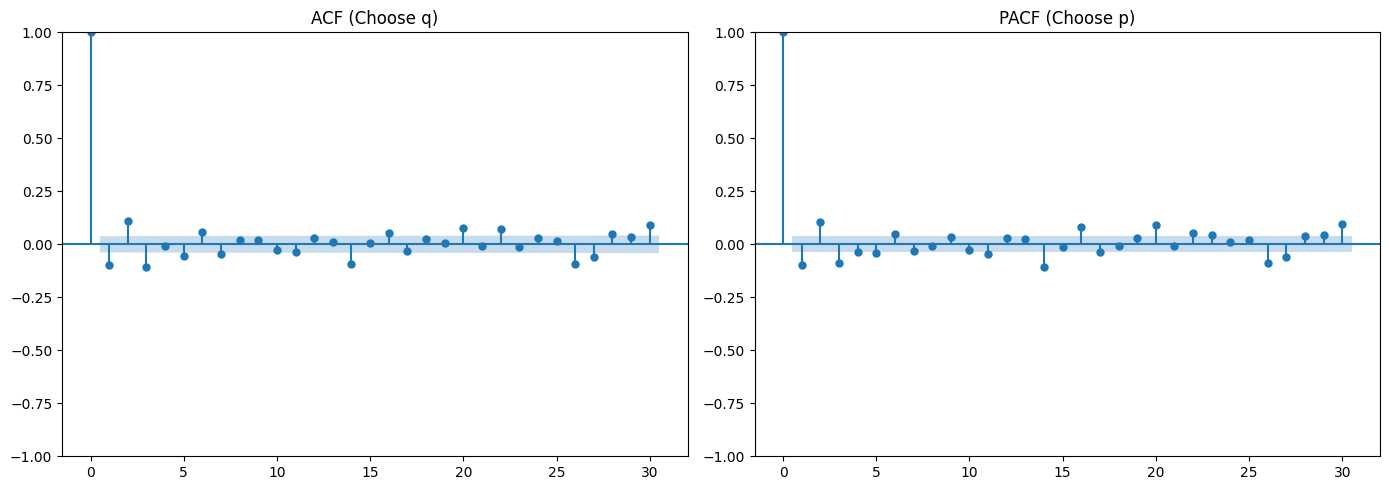

In [22]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plot_acf(prices_diff, lags=30, ax=plt.gca(), title='ACF (Choose q)')
plt.subplot(1, 2, 2)
plot_pacf(prices_diff, lags=30, ax=plt.gca(), title='PACF (Choose p)')
plt.tight_layout()
plt.show()

# Fitting ARIMA Model

In [23]:
model = ARIMA(prices, order=(5, 1, 2))  # p=5, d=1 (first diff), q=2
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

# Stock Forecasting for 30 days

In [24]:
n_days = 30
forecast_result = model_fit.get_forecast(steps=n_days)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#Predicted Model

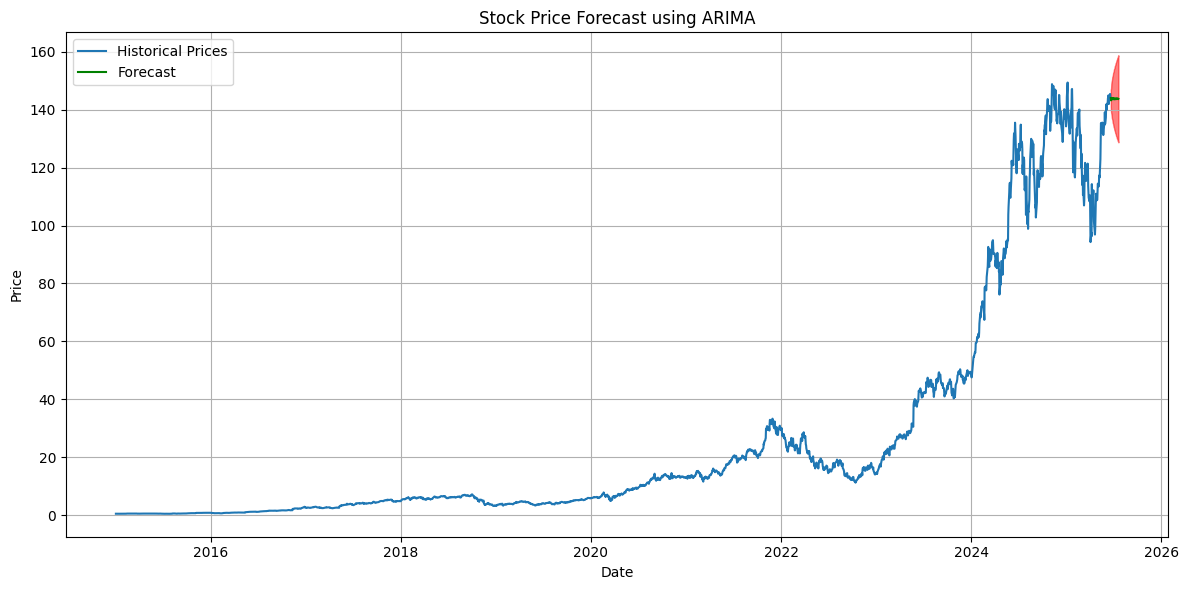

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices, label="Historical Prices")
forecast_index = [prices.index[-1] + timedelta(days=i) for i in range(1, n_days + 1)]
plt.plot(forecast_index, forecast, label="Forecast", color='green')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.5)
plt.title("Stock Price Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()